In [1]:
import pickle
import pandas as pnd
import itertools
import numpy as np
import scipy as sp
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib notebook

matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['ytick.labelsize'] = 'large'
matplotlib.rcParams['xtick.labelsize'] = 'large'
matplotlib.rcParams['axes.titlesize'] = 'large'
matplotlib.rcParams['legend.edgecolor'] = 'k'
matplotlib.rcParams['legend.shadow'] = True
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.max_open_warning'] = 100
sns.set_style('ticks', {'axes.titlesize': 'large', 'legend.frameon': True});

In [2]:
trajectories = pnd.DataFrame.from_csv(r"C:\Users\Tales\Documents\MEGAsync\Thesis\src\STAT\run_grenoble.csv")
selection = trajectories[trajectories.n_points <= 400]

In [3]:
print(selection[['duration', 'length', 'n_points']].describe())#.to_latex())

          duration       length    n_points
count   106.000000   106.000000  106.000000
mean   1938.066038  3738.844530  323.481132
std     742.794675   651.843582   48.395834
min     949.000000  2219.945207  207.000000
25%    1526.750000  3278.857349  293.500000
50%    1860.500000  3772.374756  320.500000
75%    2073.000000  4152.920239  366.750000
max    5340.000000  6961.603715  399.000000


In [4]:
selection.head()

,duration,length,n_points,path,source,trajectory_id,user_id
start_time,,,,,,,
2015-02-13 23:13:27,1971.0,4266.387037,373,C:\DATA\MapMyRun\Grenoble\22901617\16_16_Run _...,MapMyRun Android,875000485,22901617
2015-02-28 18:49:42,1408.0,2794.931631,247,C:\DATA\MapMyRun\Grenoble\22901617\16_16_Run _...,MapMyRun Android,888806205,22901617
2015-03-12 21:35:36,1336.0,3234.346917,282,C:\DATA\MapMyRun\Grenoble\22901617\16_16_Run _...,MapMyRun Android,902217427,22901617
2015-04-03 01:11:39,1324.0,3328.332607,288,C:\DATA\MapMyRun\Grenoble\22901617\16_16_Run _...,MapMyRun Android,927799845,22901617
2015-05-01 22:07:51,1544.0,3260.402196,285,C:\DATA\MapMyRun\Grenoble\22901617\16_16_Run _...,MapMyRun Android,966846139,22901617


In [5]:
p = pickle.load(open(r"C:\Users\Tales\Documents\MEGAsync\Thesis\src\STAT\step\tests\panel-copy.p", 'rb'))

In [6]:
len(p)

106

In [7]:
df = p.iloc[0]
df

,rmse,correlation,time,segments
anba-n,0.437687,0.935577,0.7355,43
anba-gvf,0.437687,0.935577,1.32062,43
paa,0.531975,0.917303,0.0121391,34
swr,0.392548,0.947793,0.672094,60
swi,0.447917,0.930028,0.261435,74
bur,0.408936,0.952569,1.36262,50
bui,0.409612,0.949658,0.587176,55
tdr,0.364874,0.954215,7.62098,69
tdi,0.259135,0.972677,3.85124,110


In [8]:
all_rmse = p.minor_xs('rmse').transpose()
all_rmse.mean()

anba-n      0.632087
anba-gvf    0.600485
paa         0.486242
swr         0.531224
swi         0.481541
bur         0.525079
bui         0.463805
tdr         0.370569
tdi         0.230259
dtype: float64

In [9]:
all_correlation = p.minor_xs('correlation').transpose()
all_correlation.mean()

anba-n      0.776787
anba-gvf    0.786683
paa         0.684756
swr         0.721232
swi         0.757690
bur         0.779088
bui         0.812941
tdr         0.866030
tdi         0.938694
dtype: float64

In [10]:
all_segments = p.minor_xs('segments').transpose()
all_segments.mean()

anba-n      18.933962
anba-gvf    21.301887
paa         14.594340
swr         26.056604
swi         35.320755
bur         20.509434
bui         25.688679
tdr         30.452830
tdi         56.707547
dtype: float64

In [11]:
all_time = p.minor_xs('time').transpose()
all_time.mean()

anba-n      0.446370
anba-gvf    1.116035
paa         0.016158
swr         0.571553
swi         0.215547
bur         1.293548
bui         0.539894
tdr         6.282722
tdi         2.777381
dtype: float64

In [12]:
temp = p.loc[p.minor_xs('segments').loc['anba-gvf'] < 5 ]
temp.minor_xs('segments').transpose()

,anba-n,anba-gvf,paa,swr,swi,bur,bui,tdr,tdi
C:\DATA\MapMyRun\Grenoble\40890583\16_16_Run _ Jog\1224694253.gpx,4,4,20,22,28,12,18,26,39
C:\DATA\MapMyRun\Grenoble\41837719\16_16_Run _ Jog\1389505709.gpx,3,3,18,18,30,16,18,22,50
C:\DATA\MapMyRun\Grenoble\49996348\16_16_Run _ Jog\879595923.gpx,4,4,19,20,30,17,25,24,49


In [13]:
p.loc[r'C:\DATA\MapMyRun\Grenoble\27031614\16_283_Easy _ General\1208172029.gpx']

,rmse,correlation,time,segments
anba-n,1.41263,-2.37736e-17,0.349014,25
anba-gvf,0.61945,0.75002,1.55958,58
paa,0.402675,-1,0.015976,4
swr,0.712849,0.785792,0.564692,52
swi,0.564334,0.841229,0.216414,61
bur,0.71855,0.770912,1.05123,40
bui,0.630161,0.838059,0.450311,42
tdr,0.452779,0.914644,8.39568,58
tdi,0.184418,0.980378,3.7157,114


<IPython.core.display.Javascript object>


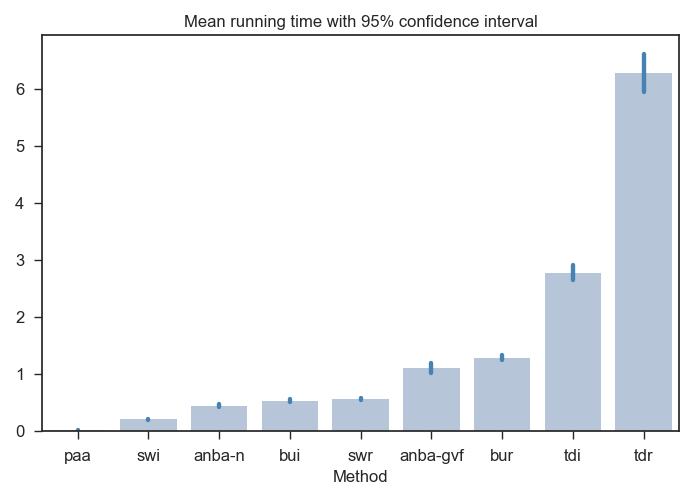

In [14]:
order = all_time.mean().sort_values().index.values
plt.figure()
plt.title('Mean running time with 95% confidence interval')
sns.barplot(data=all_time, order=order, palette=['lightsteelblue'], errcolor='steelblue')
plt.xlabel("Method")
plt.gca().set_ylim(0)
plt.tight_layout();
plt.savefig('ts-mean-time.png')

<IPython.core.display.Javascript object>


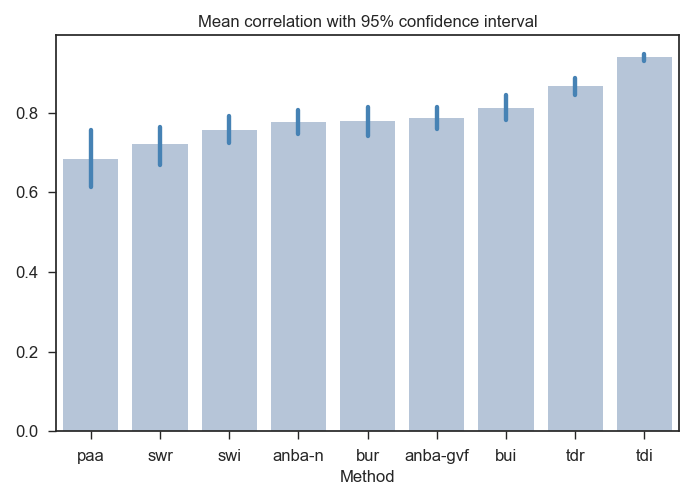

In [15]:
order = all_correlation.mean().sort_values().index.values
plt.figure()
plt.title('Mean correlation with 95% confidence interval')
sns.barplot(data=all_correlation, order=order, palette=['lightsteelblue'], errcolor='steelblue')
plt.xlabel("Method")
plt.gca().set_ylim(0)
plt.tight_layout();
plt.savefig('ts-mean-correlation.png')

<IPython.core.display.Javascript object>


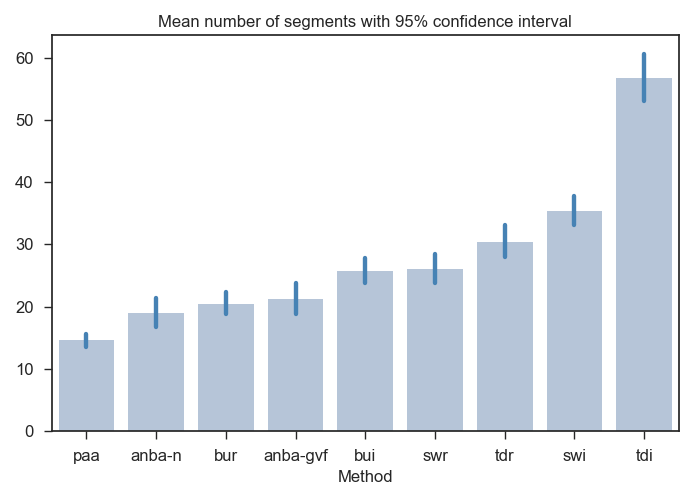

In [16]:
order = all_segments.mean().sort_values().index.values
plt.figure()
plt.title('Mean number of segments with 95% confidence interval')
sns.barplot(data=all_segments, order=order, palette=['lightsteelblue'], errcolor='steelblue')
plt.xlabel("Method")
plt.gca().set_ylim(0)
plt.tight_layout();
plt.savefig('ts-mean-segments.png')

<IPython.core.display.Javascript object>


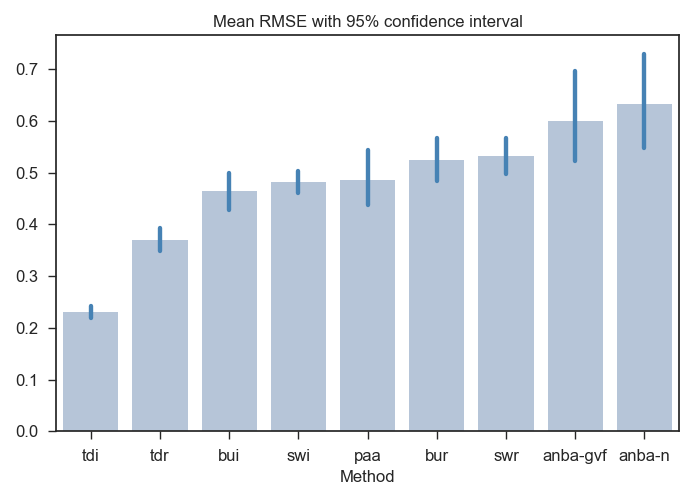

In [17]:
order = all_rmse.mean().sort_values().index.values
plt.figure()
plt.title('Mean RMSE with 95% confidence interval')
sns.barplot(data=all_rmse, order=order, palette=['lightsteelblue'], errcolor='steelblue')
plt.xlabel("Method")
plt.gca().set_ylim(0)
plt.tight_layout();
plt.savefig('ts-mean-rmse.png')

In [18]:
print(p.transpose(2, 0, 1).mean().sort_values('segments').round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &   rmse &  correlation &   time &  segments \\
\midrule
paa      &  0.486 &        0.685 &  0.016 &    14.594 \\
anba-n   &  0.632 &        0.777 &  0.446 &    18.934 \\
bur      &  0.525 &        0.779 &  1.294 &    20.509 \\
anba-gvf &  0.600 &        0.787 &  1.116 &    21.302 \\
bui      &  0.464 &        0.813 &  0.540 &    25.689 \\
swr      &  0.531 &        0.721 &  0.572 &    26.057 \\
tdr      &  0.371 &        0.866 &  6.283 &    30.453 \\
swi      &  0.482 &        0.758 &  0.216 &    35.321 \\
tdi      &  0.230 &        0.939 &  2.777 &    56.708 \\
\bottomrule
\end{tabular}

